# Project 1: Interpretable and Explainable Classification for Medical Data

Project 1 consists of three parts. The first part uses tabular data, while the second uses imaging data. In the third part, you will recap your findings and answer some general questions about the methods you have seen. You will explore techniques that enable interpretable and explainable classification using shallow and deep machine-learning methods. Before starting the project, be aware of the following points:

- The report has a word limit of 5000 words excluding references. There is no restriction on the number of plots.
- The report must be handed in as a PDF.
- The report has to be self-contained, i.e., no references to code.
- Underlined sections within questions specify how many points can be achieved by solving that specific subquestion.
- You will also need to hand in your code. Please include a requirements.txt or similar for your Python environment and a README.md explaining how to run your code.
- Use train/validation splits for training and tuning only. Report results on the test set. Note that the performance of the different methods can vary a lot.
- Using publicly available code is okay, but properly reference repositories when you use them. Of course, you are not allowed to use the code of other teams from the course.


# Part 1: Heart Disease Prediction Dataset (20 Pts)

For Part 1, we will provide you with train and test splits from the Kaggle Heart Failure Prediction Dataset aggregated from UCI Machine Learning Repository over Moodle.

### Q1: Exploratory Data Analysis (3 Pts)
Get familiar with the dataset by exploring the different features, their distribution, and the labels (1 Pt). Check for common pitfalls like missing or nonsensical data, unusual feature distribution, outliers, or class imbalance, and describe how to handle them (1 Pt). After having familiarized yourself with the data, explain how you preprocess the dataset for the remaining tasks of part 1 (1 Pt). Interpretability and explainability aim at gaining more insights about the data than just optimizing predictive performance.

### Q2: Logistic Lasso Regression (5 Pts)
By design, linear models are interpretable due to the weights that intuitively provide feature importance values. Further, we can perform l1 regularization to sparsify weights, allowing us to understand which features do not contribute to the outcome. For this question, fit a Lasso regression model with l1 regularization (1 Pt) on the dataset. Describe which preprocessing steps are crucial (1 Pt) to ensure comparability of feature coefficients. Provide performance metrics such as f1-score or balanced accuracy (1 Pt) to quantify the performance of this model. Visualize the importance of the different features and argue how they contribute to the model's output (1 Pt). Consider the following setting: A researcher is interested in the important variables and their influence on the label. They have fitted the Logistic Lasso Regression to determine the important variables. Then, they train a Logistic Regression solely on these variables and use this model to make conclusions. Elaborate why this would be a good or bad idea (1 Pt).

### Q3: Multi-Layer Perceptrons (5 Pts)
While often reaching superior performance, MLPs are generally hard to interpret, and it is not straightforward to see what is happening within these models. We thus opt for post-hoc explainability methods such as SHAP1. Post-hoc explainability methods typically use some procedure during inference to find the feature importance per sample. Similar to Q2, implement a simple MLP, train it on the dataset, and report test set performance (2 Pt). Then, visualize SHAP explanations of the outputs of two positive and negative samples and feature importances of the overall model (2 Pt). Are feature importances consistent across different predictions and compared to overall importance values (1 Pt)? Elaborate on your findings! Hint: There is an excellent SHAP library for python that provides many SHAP algorithms and visualizations out of the box.

### Q4: Neural Additive Models2 (7 Pts)
Another way to make deep models more interpretable is by careful design of the architecture. One example of such a model is the Neural Additive Model (NAM), which is an instance of the class of Generalized Additive Models3 (GAM). Read the paper about NAMs, implement the model, and train it on the dataset (3 Pt). Like Q2-3, provide performance metrics on the test set. Utilize the interpretability of NAMs to visualize the feature importances (2 Pt). Conceptually, how does the model compare to Logistic Regression and MLPs (1 Pt)? Why are NAMs more interpretable than MLPs despite being based on non-linear neural networks (1 Pt)?


Task 1 : EDA

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
3,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
4,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


missing_values: Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


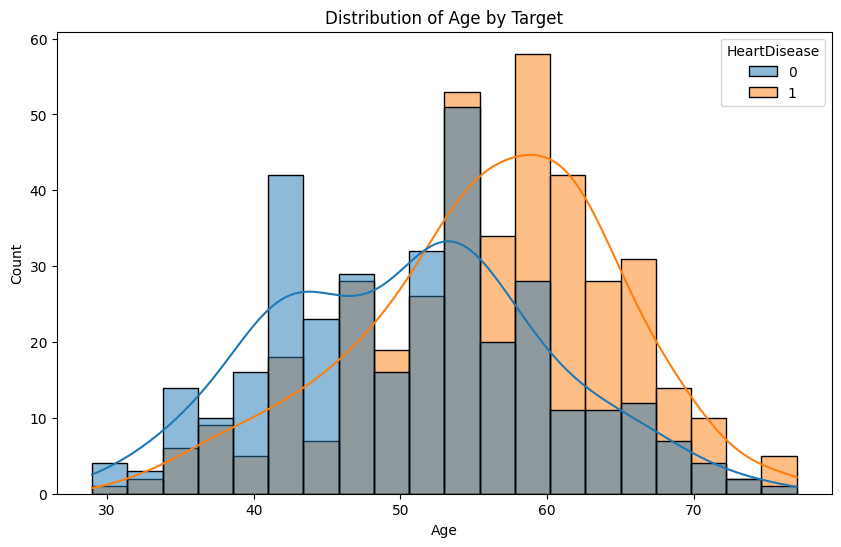

KeyError: 'Cholestrol'

In [9]:
# Load and explore the heart disease prediction dataset
# Assuming the dataset is loaded into a pandas DataFrame called 'heart_data'

import pandas as pd 
import numpy as np
heart_data = pd.read_csv("heart_failure/train_val_split.csv")
display(heart_data.head())

# Q1: Exploratory Data Analysis
# Check for missing values
missing_values = heart_data.isnull().sum()
print("missing_values:" , missing_values)

# Check for class imbalance
class_distribution = heart_data['HeartDisease'].value_counts()

# Visualize features distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=heart_data, x='Age', hue='HeartDisease', bins=20, kde=True)
plt.title('Distribution of Age by Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Q2: Handle missing or nonsensical data
# Drop rows with missing values
heart_data.dropna(inplace=True)

# Handle outliers
# Assuming 'age' and 'chol' are features with outliers
heart_data = heart_data[(heart_data['Age'] < 100) & (heart_data['Cholestrol'] < 400)]

# Handle class imbalance if present
# Oversample or undersample the minority class

# Q3: Preprocess the dataset for the remaining tasks
# Encode categorical variables if any
heart_data = pd.get_dummies(heart_data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Split the data into features and target variable
X = heart_data.drop(columns=['target'])
y = heart_data['target']